In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
X_train = get_features('/users/mtaranov/NN_all_data/train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels('/users/mtaranov/NN_all_data/labels_train_upperTriangle_noDiag.npy')
X_valid = get_features('/users/mtaranov/NN_all_data/vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels('/users/mtaranov/NN_all_data/labels_vali_upperTriangle_noDiag.npy')
X_test = get_features('/users/mtaranov/NN_all_data/test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels('/users/mtaranov/NN_all_data/labels_test_upperTriangle_noDiag.npy')
indx_train = np.load('/users/mtaranov/NN_all_data/indx_train_upperTriangle_noDiag.npy')
indx_valid = np.load('/users/mtaranov/NN_all_data/indx_vali_upperTriangle_noDiag.npy')
indx_test = np.load('/users/mtaranov/NN_all_data/indx_test_upperTriangle_noDiag.npy')                                                                            

In [15]:
X = np.concatenate((X_train, X_valid, X_test), axis=0)
y = np.concatenate((y_train, y_valid, y_test), axis=0)
indx = np.concatenate((indx_train, indx_valid, indx_test), axis=0)

(array([ 531451.,  386701.,  339895.,  273177.,  252685.,  276088.,
         207415.,  164758.,  111212.,   36474.]),
 array([  1.11600000e+03,   2.48378078e+07,   4.96744996e+07,
          7.45111914e+07,   9.93478832e+07,   1.24184575e+08,
          1.49021267e+08,   1.73857959e+08,   1.98694650e+08,
          2.23531342e+08,   2.48368034e+08]),
 <a list of 10 Patch objects>)

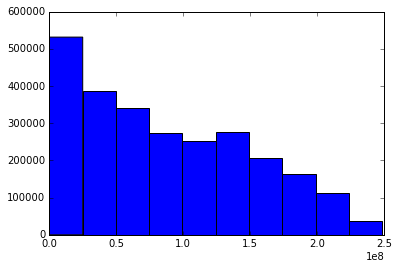

In [21]:
plt.hist(X[:, :, 10, 0] - X[:, :, 10, 1])

In [14]:
X.shape, y.shape, indx.shape

((2579856, 1, 11, 2), (2579856, 1), (2579856, 2))

In [59]:
data = np.concatenate((X[:, :, 10, 0] - X[:, :, 10, 1], y), axis=1)

In [73]:
#data_sorted = data[data[:, 0].argsort()]

In [208]:
#computes imbalance vs distance
def imbalance_at_dist(data, res, max_dist):
    imbalance_list = []
    total_pair_list = []
    #res = 4000
    #max_dist = 200000
    Nbins = int(max_dist/res)+1
    for i in range(Nbins):
        min_dist = i*res
        max_dist = (i+1)*res
        at_dist = data[(data[:,0] >= min_dist) & (data[:,0] <= max_dist)]
        pos = at_dist[at_dist[:,1] == 1].shape[0]
        neg = at_dist[at_dist[:,1] == 0].shape[0]
        if pos != 0:
            imbalance  = float(neg)/float(pos)
        else:
            if res > 5000:
                imbalance = 25000
            else:
                imbalance = 50

        total_pair = at_dist.shape[0]

        imbalance_list.append(imbalance)
        total_pair_list.append(total_pair)
    return imbalance_list, total_pair_list
    

In [182]:
def total_imbalance(data, dist=float('inf')):    
    at_dist = data[(data[:,0] >= 0) & (data[:,0] <= dist)]
    pos = at_dist[at_dist[:,1] == 1].shape[0]
    neg = at_dist[at_dist[:,1] == 0].shape[0]
    imbalance  = float(neg)/float(pos)
    print 'pos=', pos, ' neg=', neg, ' neg/pos=', imbalance

# Total imbalance

In [183]:
total_imbalance(data)

pos= 22201  neg= 2557655  neg/pos= 115.204495293


# Imbalance at distance

In [171]:
res = 1000000 #1Mb,  TAD size ~ 185kb
max_dist = data[:,0].max() # chr1
imbalance, total_pairs = imbalance_at_dist(data, res, max_dist)

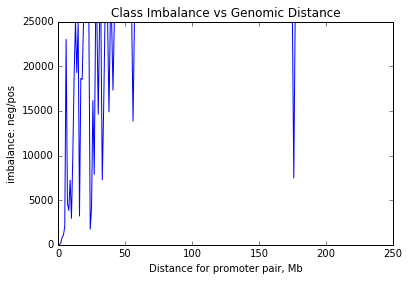

In [172]:
plt.plot(imbalance)
plt.xlabel('Distance for promoter pair, Mb')
plt.ylabel('imbalance: neg/pos')
plt.title('Class Imbalance vs Genomic Distance')

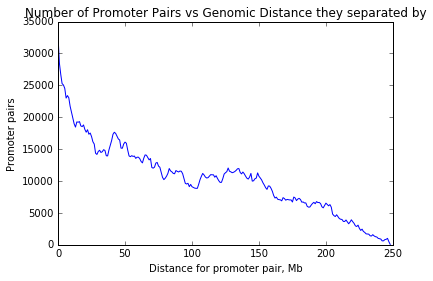

In [174]:
plt.plot(total_pairs)
plt.xlabel('Distance for promoter pair, Mb')
plt.ylabel('Promoter pairs')
plt.title('Number of Promoter Pairs vs Genomic Distance they separated by')

# Imbalance at distance less that 50 Mb

## total

In [184]:
total_imbalance(data, 50000000)

pos= 22199  neg= 901090  neg/pos= 40.5914680841


## at a distance

In [175]:
res = 1000000 #1Mb,  TAD size ~ 185kb
max_dist = 50000000 
imbalance, total_pairs = imbalance_at_dist(data, res, max_dist)

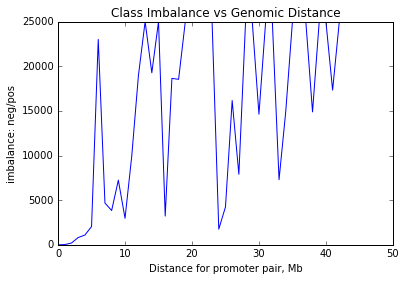

In [176]:
plt.plot(imbalance)
plt.xlabel('Distance for promoter pair, Mb')
plt.ylabel('imbalance: neg/pos')
plt.title('Class Imbalance vs Genomic Distance')

# Imbalance at distance less that 1Mb

## total

In [185]:
total_imbalance(data, 1000000)

pos= 20810  neg= 11750  neg/pos= 0.564632388275


## at distance

In [210]:
res = 1000 #1kb,  TAD size ~ 185kb
max_dist = 1000000 # 1Mb 
imbalance, total_pairs = imbalance_at_dist(data, res, max_dist)

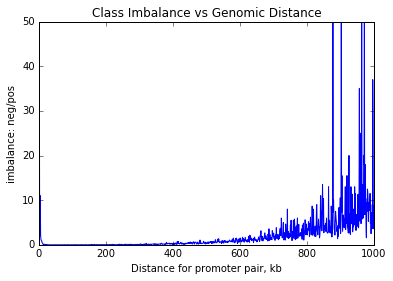

In [211]:
plt.plot(imbalance)
plt.xlabel('Distance for promoter pair, kb')
plt.ylabel('imbalance: neg/pos')
plt.title('Class Imbalance vs Genomic Distance')